<a href="https://colab.research.google.com/github/SafeyahShemali/SignLanguageModel/blob/main/Copy_of_sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sign Language Model

#### Dependencies 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split

import keras
from keras.utils  import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

#### Model Creation

In [ ]:
from re import X
class SignLanguage:
    def __init__(self):
        self.model = None
        
        self.data = {
            "train": None,
            "test" : None
        }
        self.create_model()
    
    def create_model(self):
        """
        Create a CNN model and save it to self.model
        """
    
        model = Sequential() 
        model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
        model.add(Conv2D(32, kernel_size=3, activation='relu'))
        model.add(MaxPooling2D(pool_size = (3,3)))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(25, activation='softmax'))
            
        # TODO: Compile the model with categorical_crossentropy
        model.compile('adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
        
        self.model = model
    
    def prepare_data(self, images, labels):
        """
        Normalize the dataset and split it into train/test.
        
        :param images numpy array of size (num_examples, 28*28)
        :param labels numpy array of size (num_examples, )
        """

         # Normalize
        mean = np.mean(images)
        std = np.std(images)
        images = (images-mean)/std
        

        # Split data into training and validation set
        (X_train, X_test, y_train, y_test) = train_test_split(images, labels, test_size = .2)
       
        # TODO : reshape each example into a 2D image (28, 28, 1)
        X_train = X_train.reshape(X_train.shape[0],28,28,1)
        X_test = X_test.reshape(X_test.shape[0],28,28,1)


        # one hot encoding 
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)

        self.data = {
            "train": (X_train, y_train), 
            "test" : (X_test, y_test), 
        }

    
    def train(self, batch_size:int=128, epochs:int=50, verbose:int=1):
        """
        model.fit() to train your model.
        
        :param batch_size The batch size to use for training
        :param epochs     Number of epochs to use for training
        :param verbose    Whether or not to print training output
        """
        #train the model

        history = self.model.fit(self.data['train'][0], self.data['train'][1], validation_data=(self.data['test'][0], self.data['test'][1]), epochs=epochs , verbose = verbose)
        return history
    
    def predict(self, data):
        """
        The trained model is used to predict labels for test data.
        
        :param data: numpy array of test images
        :return a numpy array of test labels. array size = (num_examples, )
        """

        # normalizatation 
        mean = np.mean(data)
        std = np.std(data)
        data = (data-mean)/std

        #reshape the data
        data = data.reshape(data.shape[0],28,28,1)
        #predict
        test_labels = self.model.predict(data)
        #use argmax to make the prediction compatable with the test labels
        test_labels = np.argmax(test_labels , axis = 1)

        return test_labels
    
    def visualize_data(self, data):
        """
        Visualizing the hand gestures
        
        :param data: numpy array of images
        """
        if data is None: return
        
        nrows, ncols = 5, 5
        fig, axs = plt.subplots(nrows, ncols, figsize=(10, 10), sharex=True, sharey=True)
        plt.subplots_adjust(wspace=0, hspace=0)

        for i in range(nrows):
            for j in range(ncols):
                axs[i][j].imshow(data[0][i*ncols+j].reshape(28, 28), cmap='gray')
        plt.show()

    def visualize_accuracy(self, history):
        """
        Plots out the accuracy measures given a keras history object
        
        :param history: return value from model.fit()
        """
        if history is None: return
        
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title("Accuracy")
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.legend(['train','test'])
        plt.show()

#### Model Testing

In [ ]:
if __name__=="__main__":
    train = pd.read_csv('train.csv')
    test  = pd.read_csv('test.csv')

    train_labels, test_labels = train['label'].values, test['label'].values
    train.drop('label', axis=1, inplace=True)
    test.drop('label', axis=1, inplace=True)

    num_classes = test_labels.max() + 1
    train_images, test_images = train.values, test.values

    print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(27455, 784) (27455,) (7172, 784) (7172,)


In [ ]:
if __name__=="__main__":
    my_model = SignLanguage()
    my_model.prepare_data(train_images, train_labels)

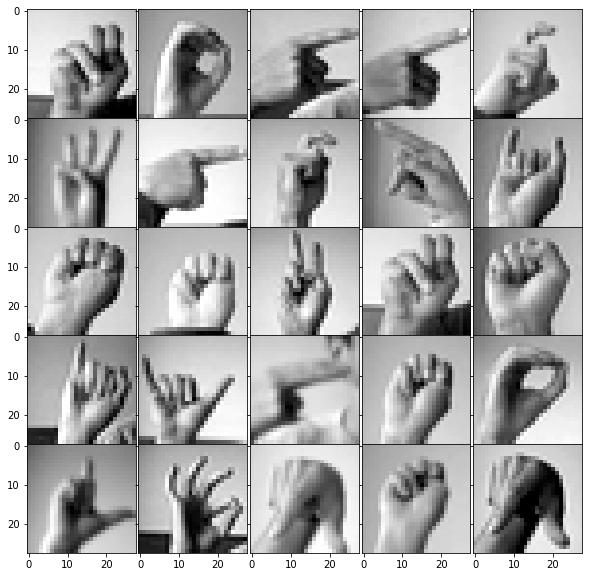

In [ ]:
if __name__=="__main__":
    my_model.visualize_data(my_model.data["train"])

Epoch 1/30
687/687 [==============================] - 9s 5ms/step - loss: 0.5759 - accuracy: 0.8211 - val_loss: 0.0339 - val_accuracy: 0.9938
Epoch 2/30
687/687 [==============================] - 3s 4ms/step - loss: 0.0604 - accuracy: 0.9814 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 3/30
687/687 [==============================] - 3s 5ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4/30
687/687 [==============================] - 3s 4ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 5/30
687/687 [==============================] - 3s 5ms/step - loss: 0.0158 - accuracy: 0.9942 - val_loss: 3.2356e-04 - val_accuracy: 1.0000
Epoch 6/30
687/687 [==============================] - 3s 4ms/step - loss: 0.0124 - accuracy: 0.9963 - val_loss: 3.1792e-04 - val_accuracy: 1.0000
Epoch 7/30
687/687 [==============================] - 3s 4ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 7.4100e-04 - val_accuracy: 0

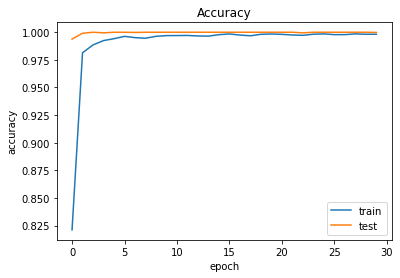

In [ ]:
if __name__=="__main__":
    history = my_model.train(epochs=30, verbose=1)
    my_model.visualize_accuracy(history)

In [ ]:
if __name__=="__main__":
    y_pred = my_model.predict(test_images) 
    accuracy = accuracy_score(test_labels, y_pred)
    print(accuracy)

225/225 [==============================] - 0s 2ms/step
0.9323759063022866
